<a href="https://www.kaggle.com/code/ranjeetkumbhar/ml-assignment-5-te-it-sppu?scriptVersionId=110993727" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Hello this is @Ranjeet_Kumbhar,<br>
Enjoy the Notebook<br>

GitHub:https://github.com/RanjeetKumbhar01/TE_IT_ML_ASSIGNMENTS_SPPU<br>
# Question

Assignment on Clustering Techniques<br>
Download the following customer dataset from below link:<br>
Data Set: https://www.kaggle.com/shwetabh123/mall-customers<br>
This dataset givesthe data of Income and money spent by the customers visiting a Shopping Mall.<br>
The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as<br>
a mall owner you need to find the group of people who are the profitable customers for the mall<br>
owner. Apply at least two clustering algorithms (based on Spending Score) to find the group of<br>
customers.<br>
a. Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if<br>
necessary.<br>
b. Perform data-preparation( Train-Test Split)<br>
c. Apply Machine Learning Algorithm<br>
d. Evaluate Model.<br>
e. Apply Cross-Validation and Evaluate Model<br>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [6]:
x = df.iloc[:,3:]
x

Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]

You can split data using train_test_split

<Axes: title={'center': 'Unclustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

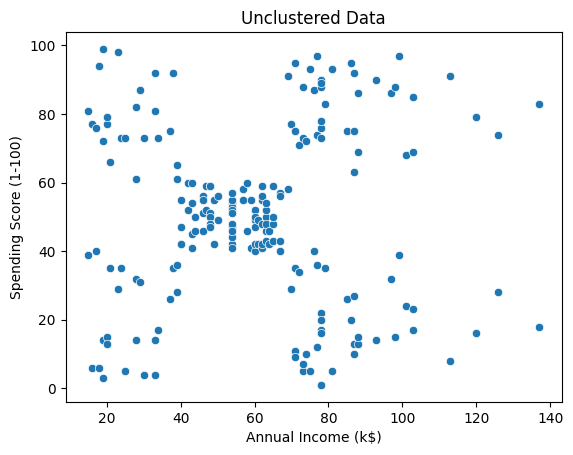

In [7]:
plt.title('Unclustered Data')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'])

In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering

AgglomerativeClustering is hierarchical Clustering

In [23]:
km = KMeans(n_clusters=4, n_init=10)

In [24]:
km.fit_predict(x)

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [25]:
#sse
km.inertia_

73679.78903948836

In [27]:
sse =[]
for k in range(1,16):
    km = KMeans(n_clusters=k, n_init=10)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [28]:
sse

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37239.835542456036,
 30227.606513152008,
 25018.57633477634,
 21826.93630323166,
 19664.68519600554,
 18067.72011418533,
 15951.036030994095,
 14293.143054331289,
 13449.908531746034,
 11765.68049914853]

Elbow Method

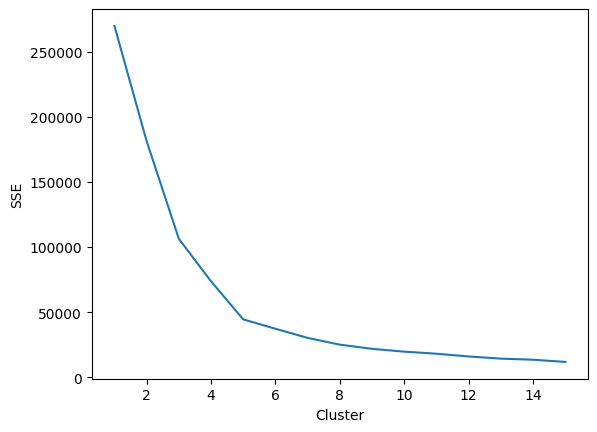

In [41]:
data = {'Cluster': range(1, 16), 'SSE': sse}
df1 = pd.DataFrame(data)
sns.lineplot(data=df1, x='Cluster', y='SSE')
# sns.lineplot(range(1,16),y = sse)
plt.xlabel('Cluster')
plt.ylabel('SSE')
plt.show()

So at 5th cluster 

In [42]:
#Method second or alternative for elbow method
from sklearn.metrics import silhouette_score

In [43]:
silh =[]
for k in range(2,16):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

/Users/redpanda/Library/Python/3.11/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/redpanda/Library/Python/3.11/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/redpanda/Library/Python/3.11/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/redpanda/Library/Python/3.11/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default 

In [44]:
silh

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5379675585622219,
 0.5288104473798049,
 0.45732611752686836,
 0.452881771814681,
 0.44760979994374317,
 0.4425484595570358,
 0.4355706230278036,
 0.4311221495661359,
 0.41294601321806196,
 0.4090601387162742]

Text(0, 0.5, 'silh')

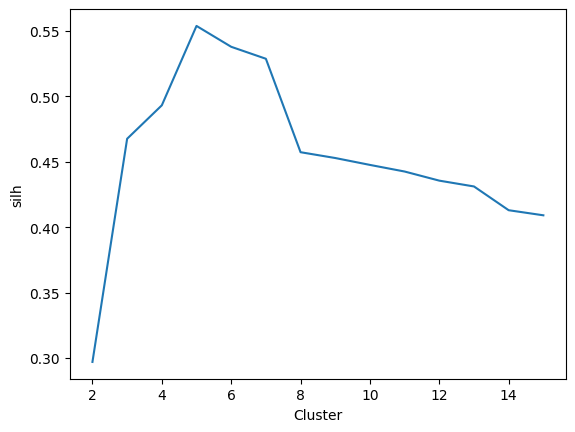

In [47]:
data = {'Cluster': range(2, 16), 'SILH': silh}
df2 = pd.DataFrame(data)
sns.lineplot(data=df2, x='Cluster', y='SILH')

# sns.lineplot(range(2,16),y = silh)
plt.xlabel('Cluster')
plt.ylabel('silh')

same at 5th cluster we are getting highest silhouette_score,<br>
this is efficient cluster

In [48]:
plt.bar(range(2,16,1),silh)

<BarContainer object of 14 artists>

In [49]:
km = KMeans(n_clusters=5,random_state=1)

In [50]:
labels = km.fit_predict(x)

/Users/redpanda/Library/Python/3.11/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
km.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [52]:
cent = km.cluster_centers_

In [63]:
plt.title('Clustered Data')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels )
# sns.scatterplot(cent[:,0],cent[:,1], s=200, color='red')
# sns.scatterplot(cent[:, 0], cent[:, 1], s=200, color='red', marker='X', label='Centroids')
plt.scatter(cent[:, 0], cent[:, 1], s=200, color='red', marker='X', label='Centroids')


In [55]:
df[labels==0]

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
43           44  Female   31                  39                      61
46           47  Female   50                  40                      55
47           48  Female   27                  40                      47
48           49  Female   29                  40                      42
49           50  Female   31                  40                      42
..          ...     ...  ...                 ...                     ...
121         122  Female   38                  67                      40
122         123  Female   40                  69                      58
126         127    Male   43                  71                      35
132         133  Female   25                  72                      34
142         143  Female   28                  76                      40

[81 rows x 5 columns]

In [56]:
agl = AgglomerativeClustering(n_clusters=5)

In [57]:
alabels = agl.fit_predict(x)

In [58]:
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [62]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Agglomerative')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'], c= alabels)

plt.subplot(1,2,2)
plt.title('KMEANS')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels )
# sns.scatterplot(cent[:,0],cent[:,1], s=200, color='red')
plt.scatter(cent[:, 0], cent[:, 1], s=200, color='red', marker='X', label='Centroids')
